In [1]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from glob import glob
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from pathlib import Path

if os.name == 'nt':
    file_path = 'C:\\JL\\Master\\DSE_I2100_Applied Machine Learning and Data Mining\\Final_Project\\lgg-mri-segmentation\\'
else:
    file_path = os.path.join(os.path.expanduser("~"), "Downloads/")

In [3]:
mask_img = glob(file_path + os.path.join('kaggle_3m','*','*_mask*'))
train_img = [file.replace('_mask', '') for file in mask_img]

In [4]:
def label(mask):
    value = np.max(imread(mask))
    return '1' if value > 0 else '0'
df = pd.DataFrame({"image": train_img,
                   "mask": mask_img,
                  "label":[label(x) for x in mask_img]})

In [5]:
len(train_img)

3929

In [6]:
df.head()

,image,mask,label
0,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,0
1,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,1
2,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,1
3,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,1
4,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,C:\JL\Master\DSE_I2100_Applied Machine Learnin...,1


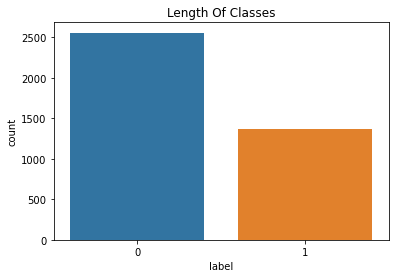

In [7]:
sns.countplot(data=df,x=df['label'])
plt.title('Length Of Classes')
plt.show()

# EDA

In [8]:
# Save images to a list
from skimage.color import rgb2gray
from skimage.io import imread
IMAGE_LIST = [ imread(path) for path in df["image"]  ]
GRAY_IMAGE_LIST = [rgb2gray(rgb_img) for rgb_img in IMAGE_LIST]

IMAGE_LIST = np.array(IMAGE_LIST)
GRAY_IMAGE_LIST = np.array(GRAY_IMAGE_LIST)

In [9]:
IMAGE_LIST.shape

(3929, 256, 256, 3)

## Inspect mage size

Text(0.5, 1.0, 'Histogram of image height')

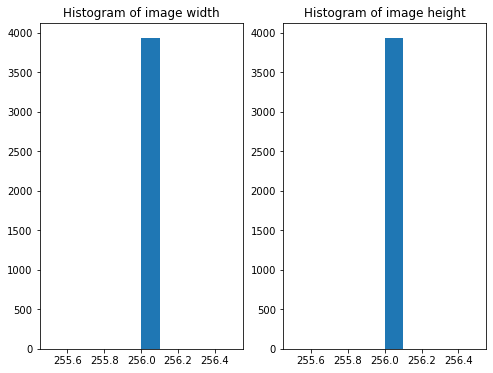

In [11]:
IMAGE_WIDTH_LIST = []
IMAGE_HEIGHT_LIST = []

for path in df['image']:
  IMAGE_WIDTH_LIST.append(imread(path).shape[0])
  IMAGE_HEIGHT_LIST.append(imread(path).shape[1])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))
width_hist = axes[0].hist(IMAGE_WIDTH_LIST)
height_hist = axes[1].hist(IMAGE_HEIGHT_LIST)
axes[0].set_title("Histogram of image width")
axes[1].set_title("Histogram of image height")

## View first 5 images

In [12]:
def show_image_and_mask(img_path, mask_path):
    rgb_img = imread(img_path)
    gray_img = rgb2gray(rgb_img)
    mask_img = imread(mask_path)

    fig, axes = plt.subplots(1, 3, figsize=(10, 8))
    ax = axes.ravel()
    ax[0].imshow(rgb_img)
    ax[0].set_title("Original")
    ax[1].imshow(gray_img, cmap=plt.cm.gray)
    ax[1].set_title("Grayscale")
    ax[2].imshow(mask_img)
    ax[2].set_title("Mask")
    fig.tight_layout()

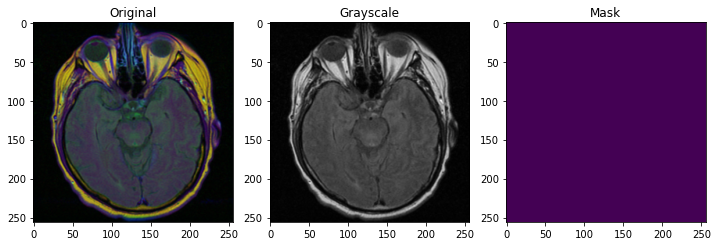

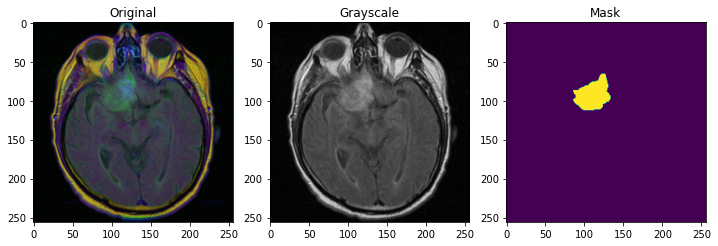

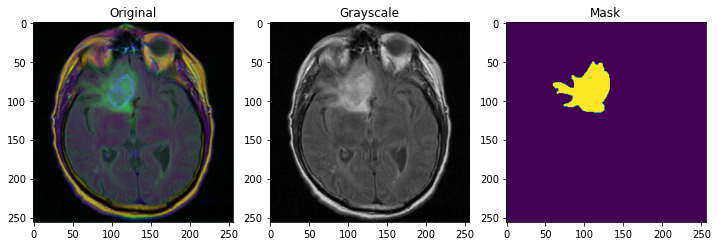

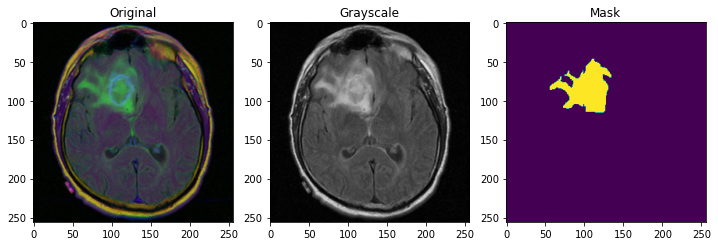

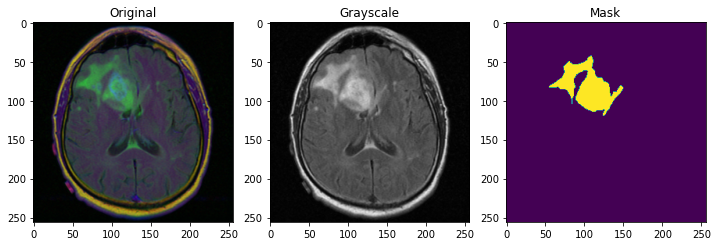

In [13]:
for idx in range(5):
    test_img = df.iloc[idx, 0]
    test_img_mask = df.iloc[idx, 1]
    show_image_and_mask(test_img, test_img_mask)

## Histogram of pixels

Text(0.5, 1.0, 'Histogram of pixels in gray images')

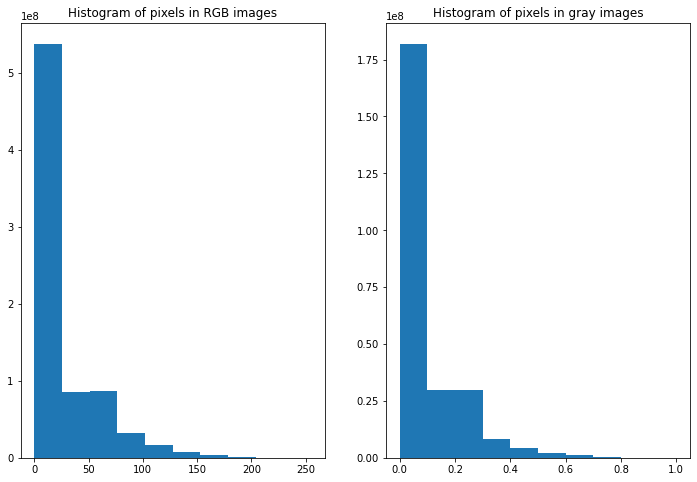

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
rgb_pixel_hist = axes[0].hist(IMAGE_LIST.reshape(-1))
gray_pixel_hist = axes[1].hist(GRAY_IMAGE_LIST.reshape(-1))
axes[0].set_title("Histogram of pixels in RGB images")
axes[1].set_title("Histogram of pixels in gray images")